<a href="https://colab.research.google.com/github/Sanjay05-coder/Car-Price-Model-Eval-for-Regression-Models/blob/main/Car_Price_Model_Eval_for_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [62]:
df=pd.read_csv('/content/Car_Price_Prediction.csv')

In [63]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [65]:
df.drop('Model', axis=1, inplace=True)

In [66]:
label_encoder = LabelEncoder()

# Apply label encoding
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   int64  
 1   Year          1000 non-null   int64  
 2   Engine Size   1000 non-null   float64
 3   Mileage       1000 non-null   int64  
 4   Fuel Type     1000 non-null   int64  
 5   Transmission  1000 non-null   int64  
 6   Price         1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [68]:
df.isnull().sum()

,0
Make,0
Year,0
Engine Size,0
Mileage,0
Fuel Type,0
Transmission,0
Price,0


In [69]:
df.head(10)

,Make,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,2015,3.9,74176,2,1,30246.207931
1,2,2014,1.7,94799,1,0,22785.747684
2,1,2006,4.1,98385,1,1,25760.290347
3,3,2015,2.6,88919,1,0,25638.003491
4,3,2004,3.4,138482,2,0,21021.386657
5,2,2015,2.7,81462,1,1,25509.932876
6,0,2000,1.3,179340,0,1,12268.206025
7,0,2018,2.0,165320,1,0,27783.737881
8,3,2004,4.4,31159,1,0,27392.178421
9,2,2006,4.4,42039,1,0,28434.533624


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# plotting heatmap to see correlation

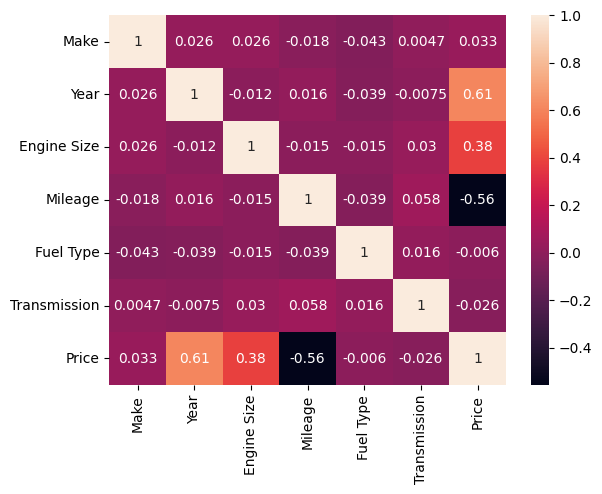

In [71]:
# Select only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
# Calculate the correlation matrix
corellation_matrix = numerical_df.corr()

# You can now use the correlation_matrix for further analysis, such as creating a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corellation_matrix,annot = True)

plt.show()

Seperating targer and feature

In [72]:
X=df.drop('Price',axis=1)
y=df['Price']

In [73]:
X.columns

Index(['Make', 'Year', 'Engine Size', 'Mileage', 'Fuel Type', 'Transmission'], dtype='object')

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Creating an Object from each machine learning class.

In [75]:
#Simple Linear regression
linear_reg = LinearRegression()#One features
#Multiple Linear Regression
multiple_linear_reg = LinearRegression()  # Same as Linear Regression, but with multiple features
#Polynomial Regression
poly_reg = PolynomialFeatures(degree=2) # You can adjust the degree as needed
#Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)  # Adjust random_state as needed

#Create a function for linear regression

In [76]:
def linear_Regression(X_test,X_train,y_train,linear_reg):
  model = linear_reg
  model.fit(X_train['Year'].values.reshape(-1,1),y_train)
  y_pred = model.predict(X_test[['Year']])
  return y_pred #Return the predicted values

In [77]:
y_pred = linear_Regression(X_test,X_train,y_train,linear_reg) # Pass necessary variables to the function
print(y_pred)

[23742.93591833 27211.46429394 23742.93591833 28697.97645492
 26715.96024028 22751.92781102 24733.94402565 25724.95213297
 27211.46429394 20274.40754273 26220.45618663 23247.43186468
 21265.41565004 24238.43997199 21760.9197037  29193.48050857
 20769.91159639 29688.98456223 27211.46429394 30184.48861589
 22751.92781102 22256.42375736 20274.40754273 24238.43997199
 21265.41565004 24238.43997199 30184.48861589 19778.90348907
 22751.92781102 25229.44807931 24733.94402565 21265.41565004
 23742.93591833 27706.9683476  28697.97645492 28697.97645492
 24733.94402565 25724.95213297 28697.97645492 20274.40754273
 27706.9683476  27211.46429394 28697.97645492 26715.96024028
 24733.94402565 21760.9197037  29688.98456223 29193.48050857
 25229.44807931 26220.45618663 27211.46429394 20274.40754273
 28202.47240126 23247.43186468 21265.41565004 27211.46429394
 20274.40754273 28697.97645492 29688.98456223 27211.46429394
 29193.48050857 27706.9683476  29193.48050857 23742.93591833
 29688.98456223 26715.96

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#Create funtion for multiple linear regression

In [78]:
def mulitple_linear_Regression(X_test,X_train,y_train,multiple_linear_reg):
  model = multiple_linear_reg
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  return y_pred


In [79]:

y_pred_2 = mulitple_linear_Regression(X_test,X_train, y_train, multiple_linear_reg) # Pass necessary variables to the function
print(y_pred_2)

[25733.58364885 29671.89696817 26840.32552965 27527.08613739
 27820.37579407 19344.517305   22925.07532601 27422.32001643
 30739.50967988 24158.1136298  28659.60203211 22034.42099462
 18582.02853956 26418.39532366 24477.82994473 28126.42767806
 21224.06568248 27366.02231403 24301.84140518 30766.05888466
 21661.70557391 22239.02150916 16905.71381852 22629.47590891
 16631.05545967 26190.46832723 28569.61536621 21359.49237005
 22698.23535553 29864.59281495 19859.51749099 24074.97000802
 22230.15649102 34095.01863575 29690.22410538 29443.20719588
 18549.91325206 28990.34364187 30802.0671066  24118.84336019
 31219.36976007 26452.67262319 28998.66179736 25384.72305843
 21216.30767949 21344.53483284 32372.53175504 32874.32225432
 25326.30177484 22083.61397718 32086.23898578 21280.65957089
 24096.86884665 19074.21727827 21500.10515258 27290.85501196
 15361.07681843 29911.39073455 26854.19663198 24813.85416733
 28097.86982269 29943.57685925 25700.76693536 26364.22066116
 33386.62950858 24117.14

#Creating function for polynomial regression

In [80]:
def polynomial_regression(X_test,X_train,y_train,poly_reg):

  model = poly_reg# This will assume poly_reg is PolynomialFeatures
  # Create a LinearRegression model

  poly_reg_model = LinearRegression()

  #Change my feature to a polynomial feature
  X_train_poly = model.fit_transform(X_train)

  #Fit the linear regression model to the transformed data
  poly_reg_model.fit(X_train_poly,y_train)

  #Change my test features to a polynomial feature
  X_test_poly = model.fit_transform(X_test) # Transform the test data

  # Now predict using the LinearRegression model on the transformed data
  y_pred = poly_reg_model.predict(X_test_poly)


  return y_pred

In [81]:
y_pred_3 = polynomial_regression(X_test,X_train, y_train, poly_reg)
print(y_pred_3)

[26070.96161507 29845.14527139 26846.96665981 27556.28124788
 27683.11837046 19022.48602337 22851.96094754 27288.10975347
 30509.00568362 24342.34035447 28645.51012879 21922.06947078
 18942.48964261 26175.35423164 24384.48439145 28475.74122922
 20936.39151343 27457.4372883  24267.23656468 30771.80018552
 21679.79228636 21913.1126823  17251.2913983  22332.22668276
 16547.25158558 25960.65062595 28710.01740092 21319.83107718
 23178.75136012 29770.06098995 19490.37509718 24472.36583704
 22152.82720383 34436.23867724 29762.27796339 29118.45652762
 18868.85523091 28632.58365517 30955.7171947  23591.4466564
 31106.80961813 26441.66878302 29262.80631223 25177.7137291
 21276.0564484  21604.01294507 32127.30037601 33729.54017893
 25166.81888236 22121.30384278 31994.8150499  21385.17264477
 23566.15182317 18853.17172475 21403.76773703 27787.01530534
 15450.28222838 30068.00693185 27019.69063989 25002.203844
 28009.29301207 30185.091271   25725.33761867 26320.76880192
 34021.96958328 24078.199040

#Creating function for regression tree

In [82]:
def regression_tree(X_test,X_train, y_train, tree_reg):
  models = tree_reg
  models.fit(X_train, y_train)
  y_pred = models.predict(X_test)
  return y_pred

In [83]:
y_pred_4 = regression_tree(X_test,X_train, y_train, tree_reg)
print(y_pred_4)

[22576.83036324 27413.65008271 28794.44897145 24023.13991479
 25521.10745921 22142.99418971 24970.60376302 25677.70591326
 30459.92937115 22824.09162664 31337.12983292 25114.94730666
 19333.30421313 20583.05562197 26999.01593577 27101.14627061
 16564.63403395 22629.29433068 23280.28306481 35170.04046427
 22913.2282529  21202.90858794 16031.69265948 25246.75216412
 16397.57004325 24544.36559654 27527.99427901 22252.43335107
 26280.30378239 27848.73635318 17055.1814546  22311.5921781
 19520.43291703 30766.84411922 31648.72781951 31648.72781951
 16446.89229193 30072.03170701 29846.04658151 29609.06386426
 30315.55562199 23280.28306481 31648.72781951 25626.93215059
 23096.92351456 20240.93560425 39203.51407329 33670.55625709
 26708.68842683 21533.14900906 31349.14883766 16564.63403395
 25710.80367922 20035.5788591  24517.08146567 26525.93371811
 17083.78199014 29288.89578863 23005.61866635 26303.69609539
 29863.89785263 29780.256126   23005.61866635 26024.54621022
 35063.59836264 23211.245

# Model Evaluation

In [84]:
MM = [linear_reg,multiple_linear_reg,poly_reg,tree_reg]#Put the models in the list for iteration
x = [y_pred,y_pred_2,y_pred_3,y_pred_4]#Put the prediction in the list for iteration

In [85]:
a={'Model Name':[],'R2_score':[],'Adj_R_Square':[]  }
Results=pd.DataFrame(a)
Results.head()

,Model Name,R2_score,Adj_R_Square


In [86]:
def model_eval(y_test, pred, model):
    r_squared = round(metrics.r2_score(y_test, pred), 2)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1), 2)

    new_row = {'Model Name': str(model),
               'R2_score': r_squared,
               'Adj_R_Square': adjusted_r_squared
                }

    global Results # Declare Results as global within the function
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

##
`zip(...): This function takes multiple iterables (like lists) as arguments. It creates an iterator that yields tuples, where each tuple contains the corresponding elements from each of the input iterables.`


In [87]:
for model,pred in zip(MM,x):
  model_eval(y_test,pred,model)

In [88]:
Results

,Model Name,R2_score,Adj_R_Square
0,LinearRegression(),0.43,0.41
1,LinearRegression(),0.82,0.81
2,PolynomialFeatures(),0.81,0.80
3,DecisionTreeRegressor(random_state=42),0.62,0.61


# We can see that based on the table that r2 and adjusted r2 score that Linear regression has the highest scoring which means the predicted output is close to the actual output

In [92]:
def generate_subplots_for_models(x, X_train, y_train, X_test, y_test):
    """
    Generates subplots for a list of regression models, comparing actual and predicted values.

    Args:
        MM: A list of regression model objects.
        X_train: The training data features.
        y_train: The training data target variable.
        X_test: The test data features.
        y_test: The test data target variable.
        feature_names: A list of feature names in the data.

    Returns:
        None (Displays the subplots).
    """

    num_pred = len(x)
    num_rows = int(np.ceil(np.sqrt(num_pred)))
    num_cols = int(np.ceil(num_pred / num_rows))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (pred, model) in enumerate(zip(x, MM)): # Use zip to iterate through predictions and models
      # Visualization within the function
      axes[i].scatter(X_test['Year'], y_test, color='blue', label='Actual')
      axes[i].scatter(X_test['Year'], pred, color='red', label='Predicted')
      axes[i].set_title(f'Model: {model}')
      axes[i].set_xlabel('Year')
      axes[i].set_ylabel('Price')
      axes[i].legend()

    plt.tight_layout()
    plt.show()

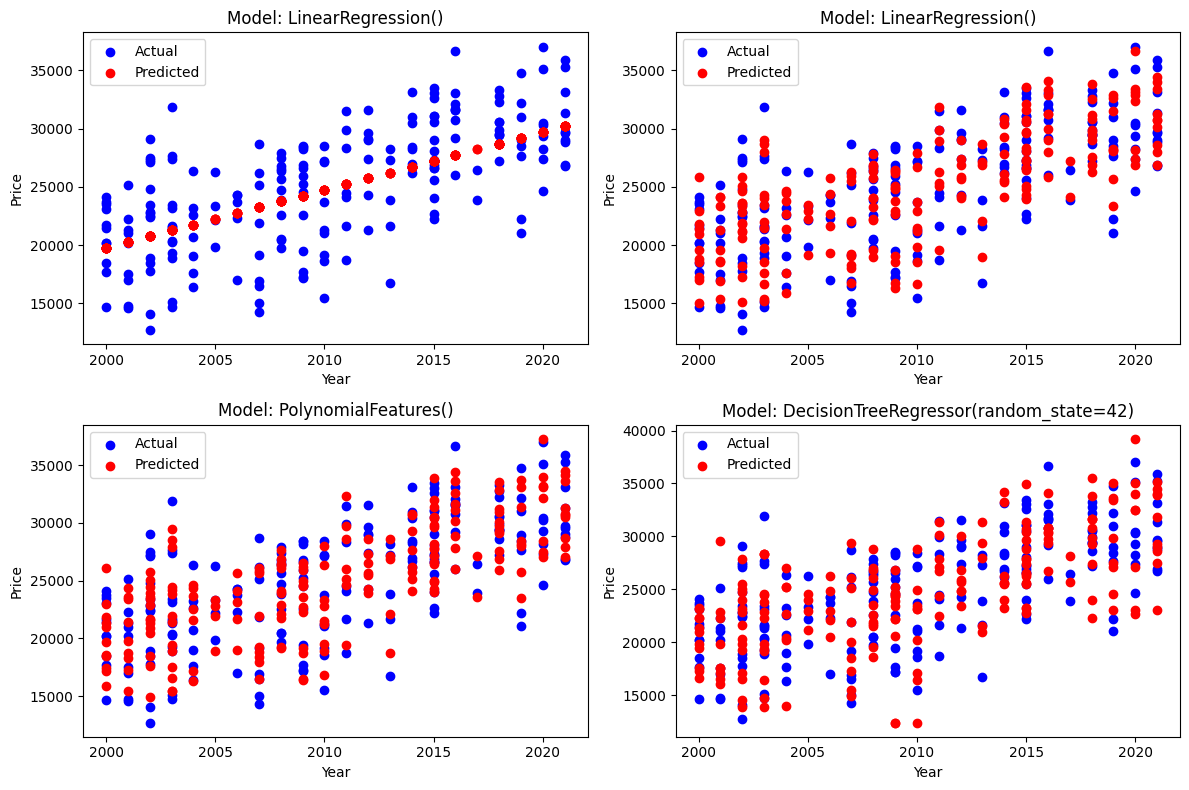

In [93]:
generate_subplots_for_models(x, X_train, y_train, X_test, y_test)